# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Load data

In [7]:
start = '2012-01-01'
end = '2024-10-01'
stock = 'GOOG'

data = yf.download(stock, start=start, end=end)

C:\Users\tanzi\AppData\Local\Temp\ipykernel_732\2276054162.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [8]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...
2024-09-24,163.072540,163.979388,161.468123,163.680426,18774100
2024-09-25,162.424805,163.647540,162.210539,162.404870,13607900


In [9]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
3201,2024-09-24,163.072540,163.979388,161.468123,163.680426,18774100
3202,2024-09-25,162.424805,163.647540,162.210539,162.404870,13607900
3203,2024-09-26,163.261887,164.926094,162.933029,164.457722,18234500


# Data Analysis

In [10]:
ma_100_days = data['Close'].rolling(window=100).mean()

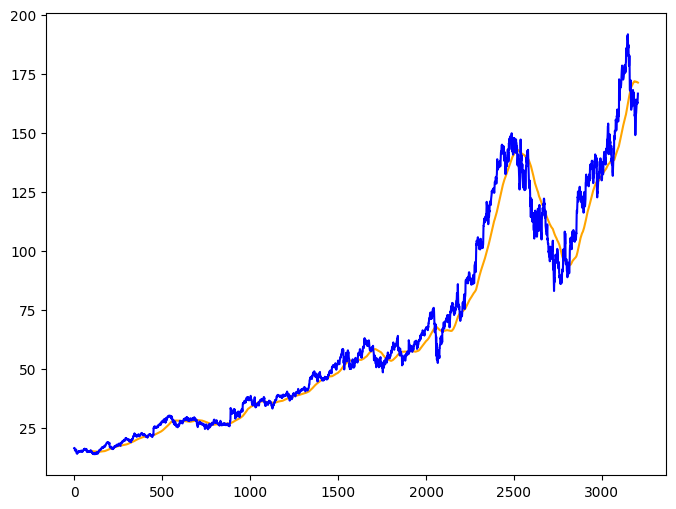

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, label='100-Day Moving Average', color='orange')
plt.plot(data['Close'], label='Close Price', color='blue')
plt.show()

In [12]:
ma_200_days = data['Close'].rolling(window=200).mean()

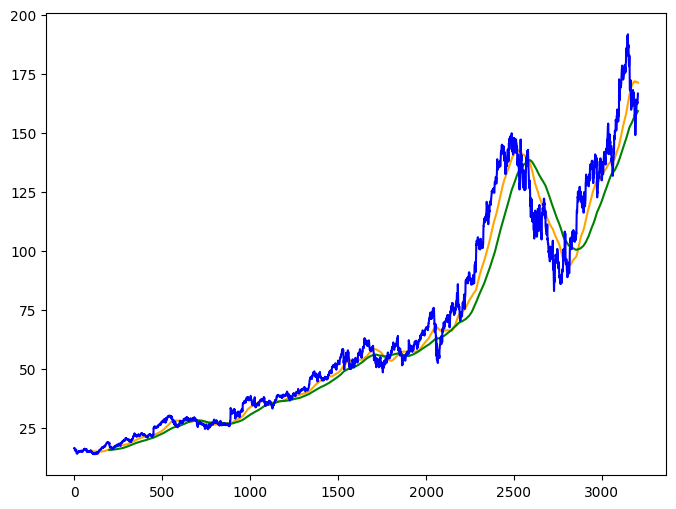

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, label='100-Day Moving Average', color='orange')
plt.plot(ma_200_days, label='100-Day Moving Average', color='green')
plt.plot(data['Close'], label='Close Price', color='blue')
plt.show()

In [14]:
# Check for null values
data.isnull().sum()

Price   Ticker
Date              0
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

# Preprocessing

In [16]:
data_train = pd.DataFrame(data['Close'][:int(0.8*len(data))])
data_test = pd.DataFrame(data['Close'][int(0.8*len(data)):])

In [20]:
data_train, data_train.shape

(Ticker        GOOG
 0        16.475199
 1        16.546259
 2        16.316738
 3        16.094151
 4        15.411779
 ...            ...
 2559    131.341293
 2560    125.717224
 2561    126.526405
 2562    133.074966
 2563    131.897980
 
 [2564 rows x 1 columns],
 (2564, 1))

In [21]:
data_test, data_test.shape

(Ticker        GOOG
 2564    129.704514
 2565    125.992088
 2566    128.894333
 2567    132.900513
 2568    133.805145
 ...            ...
 3201    163.072540
 3202    162.424805
 3203    163.261887
 3204    164.716827
 3205    166.610229
 
 [642 rows x 1 columns],
 (642, 1))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [24]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[0.01936669],
       [0.01988928],
       [0.01820134],
       ...,
       [0.82870557],
       [0.87686502],
       [0.86820922]])

In [ ]:
x = []
y = []

for i in range(100, data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100:i])
    y.append(data_train_scaled[i, 0])

In [31]:
x, y = np.array(x), np.array(y)

# Create model

In [30]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [33]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation='relu', input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, return_sequences=True, activation='relu'))
model.add(Dropout(0.3))

model.add(LSTM(units=80, return_sequences=True, activation='relu'))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

In [36]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
77/77 [==============================] - 84s 988ms/step - loss: 0.0197
Epoch 2/50
77/77 [==============================] - 75s 971ms/step - loss: 0.0047
Epoch 3/50
77/77 [==============================] - 76s 984ms/step - loss: 0.0036
Epoch 4/50
77/77 [==============================] - 71s 928ms/step - loss: 0.0039
Epoch 5/50
77/77 [==============================] - 61s 787ms/step - loss: 0.0034
Epoch 6/50
77/77 [==============================] - 66s 858ms/step - loss: 0.0036
Epoch 7/50
77/77 [==============================] - 65s 838ms/step - loss: 0.0029
Epoch 8/50
77/77 [==============================] - 56s 721ms/step - loss: 0.0027
Epoch 9/50
77/77 [==============================] - 63s 815ms/step - loss: 0.0028
Epoch 10/50
77/77 [==============================] - 75s 974ms/step - loss: 0.0024
Epoch 11/50
77/77 [==============================] - 59s 766ms/step - loss: 0.0026
Epoch 12/50
77/77 [==============================] - 62s 799ms/step - loss: 0.0024
Epoch 13/50
7

# Test the model

In [37]:
past_100_days = data_train.tail(100)
data_test = pd.concat((past_100_days, data_test), ignore_index=True)
data_test

Ticker,GOOG
0,142.115738
1,142.972168
2,141.573456
3,141.936813
4,137.805862
...,...
737,163.072540
738,162.424805
739,163.261887
740,164.716827


In [38]:
data_test_scaled = scaler.transform(data_test)

In [52]:
x_test = []
y_test = []

for i in range(100, data_test_scaled.shape[0]):
    x_test.append(data_test_scaled[i-100:i])
    y_test.append(data_test_scaled[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [53]:
y_test

array([0.85207803, 0.8247761 , 0.84611979, 0.87558205, 0.8822349 ,
       0.89832581, 0.89596445, 0.92373796, 0.91076869, 0.93130089,
       0.93283264, 0.93596516, 0.94546908, 0.94104249, 0.91914686,
       0.92682683, 0.94833868, 0.92948074, 0.90106366, 0.8958657 ,
       0.87792154, 0.84711392, 0.83671821, 0.85069261, 0.82851918,
       0.83369516, 0.85248391, 0.83577514, 0.81159114, 0.77267236,
       0.79925426, 0.77188281, 0.73909048, 0.77119195, 0.7386957 ,
       0.7547098 , 0.7618196 , 0.79431949, 0.7517088 , 0.74376569,
       0.72493317, 0.73590303, 0.73134464, 0.72549616, 0.75002006,
       0.73742368, 0.75137984, 0.71994   , 0.70783703, 0.69736439,
       0.71457017, 0.67260287, 0.67197053, 0.68992934, 0.72284971,
       0.73191504, 0.73263143, 0.75901593, 0.73575317, 0.75363887,
       0.75523991, 0.75530202, 0.7383411 , 0.71282296, 0.67955175,
       0.68187288, 0.70524169, 0.67779354, 0.68678206, 0.71711793,
       0.71725691, 0.72201263, 0.76480606, 0.75080226, 0.72118

In [54]:
y_predict = model.predict(x_test)

21/21 [==============================] - 5s 249ms/step


In [55]:
# Unscale the predicted values
y_predict = y_predict/scaler.scale_
y_predict

array([[123.46009665],
       [123.31901568],
       [123.15923684],
       [122.97538663],
       [122.79401649],
       [122.65552907],
       [122.59096591],
       [122.61947063],
       [122.75666938],
       [122.99853405],
       [123.33691117],
       [123.75852501],
       [124.24156543],
       [124.76972551],
       [125.32232979],
       [125.863101  ],
       [126.36118401],
       [126.80911426],
       [127.20398212],
       [127.52366137],
       [127.74274333],
       [127.84132251],
       [127.79481694],
       [127.58160288],
       [127.21372414],
       [126.71051077],
       [126.10144816],
       [125.4351897 ],
       [124.75923784],
       [124.08814079],
       [123.39884837],
       [122.68121331],
       [121.93127236],
       [121.11697897],
       [120.24144541],
       [119.31236315],
       [118.34559339],
       [117.38170084],
       [116.486278  ],
       [115.68525223],
       [114.97299879],
       [114.31302158],
       [113.68567446],
       [113

In [56]:
y_test = y_test/scaler.scale_
y_test

array([115.86273289, 112.15030766, 115.05255222, 119.05873203,
       119.9633646 , 122.15135288, 121.83026218, 125.60681248,
       123.84329319, 126.63519382, 126.8434763 , 127.26942539,
       128.56173801, 127.95982456, 124.98252964, 126.0268259 ,
       128.95193577, 126.38769627, 122.52363682, 121.81683445,
       119.37684727, 115.18772984, 113.77415562, 115.67434788,
       112.65927982, 113.36309147, 115.91792393, 113.64592075,
       110.35746098, 105.06541538, 108.67993259, 104.95805454,
       100.49906254, 104.86411381, 100.44538212, 102.62292576,
       103.58969212, 108.00891972, 102.21485996, 101.13478184,
        98.57399845, 100.06564426,  99.44580936,  98.6505518 ,
       101.98523045, 100.27241611, 102.17012882,  97.89504337,
        96.24932194,  94.82528782,  97.16487217,  91.45829868,
        91.37231541,  93.81429386,  98.29069614,  99.52336979,
        99.6207819 , 103.2084589 , 100.04526615, 102.4773035 ,
       102.69500828, 102.70345402, 100.39716434,  96.92

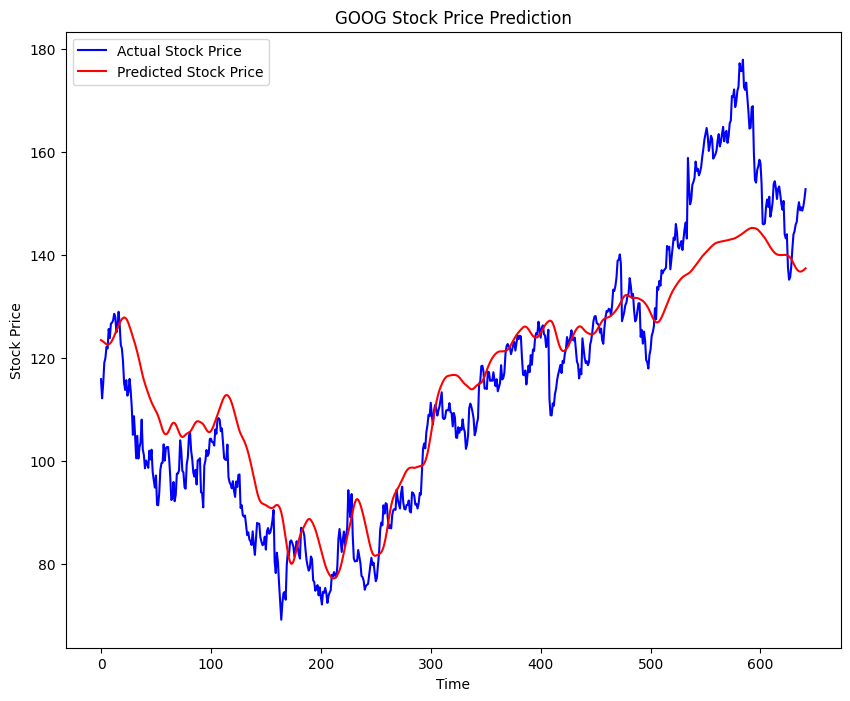

In [57]:
plt.figure(figsize=(10, 8))
plt.plot(y_test, color='blue', label='Actual Stock Price')      
plt.plot(y_predict, color='red', label='Predicted Stock Price')
plt.title(f'{stock} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Save model

In [58]:
model.save('stock_price_predictor.h5')